# 0. 导入相关库并设置全局变量

In [156]:
from __future__ import division
import tushare as ts
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from copy import copy
from datetime import datetime 
from pandas.io.excel import ExcelWriter
from scipy.stats.stats import pearsonr  

stockCodeList = ['600815', '600848', '002337']
indexCodeList = ['sh', 'sz']

# 1. 导入所有的指数数据和股票数据

In [120]:
indexPriceData = {}
for code in indexCodeList:
    indexPriceData[code] = ts.get_hist_data(code)['close']    

stockPriceData = {}
for code in  stockCodeList:
    s = ts.get_h_data(code)['close']    
    s.index = Series(s.index).apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))
    stockPriceData[code] = s

[Getting data:]####[Getting data:]####[Getting data:]####

# 2.合并形成统一的数据表

In [119]:

priceData = indexPriceData.copy()
priceData.update(stockPriceData)
df = pd.concat([priceData[code] for code in priceData.keys()], axis=1, keys=priceData.keys())
df = df[indexCodeList  + stockCodeList]
df.tail()

,sh,sz,600815,600848,002337
2015-10-12,3287.66,10961.363,8.58,16.82,8.28
2015-10-13,3293.23,11042.130,8.67,18.50,8.30
2015-10-14,3262.44,10901.479,8.47,18.88,8.05
2015-10-15,3338.07,11229.380,8.80,19.98,8.43
2015-10-16,3391.35,11374.834,9.24,20.41,8.64


# 3.将数据到出到文件

In [123]:
writer = ExcelWriter('output.xls')
df.to_excel(writer,u'data')
writer.save()

# 4.读取导出的文件

In [127]:
data = pd.io.excel.read_excel('output.xls','data')
data.tail()

,sh,sz,600815,600848,002337
2015-10-12,3287.66,10961.363,8.58,16.82,8.28
2015-10-13,3293.23,11042.130,8.67,18.50,8.30
2015-10-14,3262.44,10901.479,8.47,18.88,8.05
2015-10-15,3338.07,11229.380,8.80,19.98,8.43
2015-10-16,3391.35,11374.834,9.24,20.41,8.64


# 5.计算方差
例1．计算下列一组数据的极差、方差及标准差（精确到0.01) <br />
50，55，96，98，65，100，70，90，85，100<br/>
方差为:334.69<br/>

In [161]:
x = [50, 55, 96, 98, 65, 100, 70, 90, 85, 1]
np.var(a)
#help(np.var)

8.25

# 6.相关系数的计算

In [162]:
x=[2,4,5,6,4,7,8,5,6,7]
y=[3,2,6,5,3,6,5,4,4,5]
pearsonr(x,y)


(0.69213308131964058, 0.026563850209295529)

# 7.计算协方差
首先计算x、y的期望值：<br/>
ux=（3+2+4+5+6）/5=4 <br/>
uy=（9+7+12+15+17）/5=12<br/>
利用你给的公式把xi（3、2、4、5、6）、yi（9、7、12、15、17）及如上计算得到的期望依次带入公式,算得:<br/>
Cov（X,Y）=5.2<br/>

In [163]:
x = [3, 2, 4, 5, 6]
y = [9, 7, 12, 15, 17]
pearsonr(x,y)[0] * ( np.var(x) **.5  * np.var(y) **.5)

5.2000000000000002

# 8.计算收益率

In [167]:
a = Series([1, 2, 3, 4, 5])
a.diff() / a

0         NaN
1    0.500000
2    0.333333
3    0.250000
4    0.200000
dtype: float64

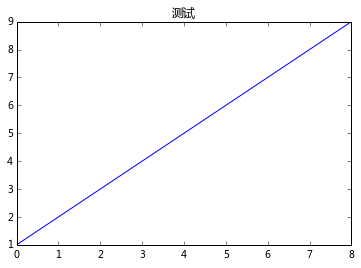

In [1]:
%matplotlib inline      
import numpy
from pandas import Series
import scipy
from sklearn import datasets
from pandas import Series as s
s(range(1,10)).plot(title=u'测试')

In [2]:
from sympy import *
init_printing(use_latex='mathjax')
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

⌠                 x           x       
⎮  x             ℯ ⋅sin(x)   ℯ ⋅cos(x)
⎮ ℯ ⋅cos(x) dx = ───────── + ─────────
⌡                    2           2    